In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; 
sns.set(rc={'figure.figsize':(20,10)})
import os
DATA_DIR = 'data/'
os.listdir(DATA_DIR)

ImportError: No module named numpy

In [4]:
purchase_df = pd.read_excel(DATA_DIR + 'Purchase.xls', parse_dates=['Date'])
purchase_df.shape

(4941, 57)

In [5]:
purchase_df.head(5)

,Voucher Number,Reference,Date,Voucher Type,Party Name,Party Alias,Supplier,Party Address,Party Pincode,Party Contact Person,...,Rate,Unit,Discount,Discount Amount,Amount,Standard Cost,Standard Price,Purchase/Sales Ledger,Tax Classification,Narration
0,SLBLR-2,SLBLR-2,2018-04-02,Purchase,B. V. Bio - Corp Pvt. Ltd- Biotech,NaN,B. V. Bio - Corp Pvt. Ltd- Biotech,"NO. 5, First Floor, 3rd Main, Raghav Nagar,, T...",NaN,NaN,...,6720.00,Nos,0,NaN,161280.0,NaN,NaN,GST Purchase Exempted,NaN,Received by ranjith grn no 001
1,SLBLR-2,SLBLR-2,2018-04-02,Purchase,B. V. Bio - Corp Pvt. Ltd- Biotech,NaN,B. V. Bio - Corp Pvt. Ltd- Biotech,"NO. 5, First Floor, 3rd Main, Raghav Nagar,, T...",NaN,NaN,...,3700.00,Nos,0,NaN,59200.0,NaN,NaN,GST Purchase Exempted,NaN,Received by ranjith grn no 001
2,SLBLR/3,SLBLR/3,2018-04-02,Purchase,B. V. Bio - Corp Pvt. Ltd- Biotech,NaN,B. V. Bio - Corp Pvt. Ltd- Biotech,"NO. 5, First Floor, 3rd Main, Raghav Nagar,, T...",NaN,NaN,...,2080.00,Nos,0,NaN,16640.0,NaN,NaN,GST Purchase Exempted,NaN,Received by ranjith grn no 001
3,181636,181636,2018-04-02,Purchase,Intervet India Pvt Ltd,NaN,Intervet India Pvt Ltd,"C/o.Parekh Intergrated Service, Attalika Wareh...",560059,NaN,...,2721.60,Nos,0,NaN,141523.0,NaN,NaN,GST Purchase 5%,NaN,recd by ranjith grn-002
4,181637,181637,2018-04-02,Purchase,Intervet India Pvt Ltd,NaN,Intervet India Pvt Ltd,"C/o.Parekh Intergrated Service, Attalika Wareh...",560059,NaN,...,355.18,Nos,0,NaN,142072.0,NaN,NaN,GST Purchase 5%,NaN,recd by ranjith grn-002


In [9]:
columns = purchase_df.columns.tolist()
sum_df = pd.DataFrame()
sum_df['col_name'] = columns
sum_df['num_of_missing'] = [purchase_df[col].isnull().sum() for col in columns]
sum_df['percent_of_missing'] = sum_df['num_of_missing'].apply(lambda x: x / purchase_df.shape[0])
sum_df['num_of_unique'] = [purchase_df[col].nunique() for col in columns]

In [10]:
sum_df

,col_name,num_of_missing,percent_of_missing,num_of_unique
0,Voucher Number,0,0.000000,2811
1,Reference,0,0.000000,2811
2,Date,0,0.000000,284
3,Voucher Type,0,0.000000,2
4,Party Name,0,0.000000,198
5,Party Alias,4941,1.000000,0
6,Supplier,0,0.000000,204
7,Party Address,0,0.000000,197
8,Party Pincode,1459,0.295284,77
9,Party Contact Person,4941,1.000000,0


In [11]:
print(sum_df[sum_df['percent_of_missing'] > 0.98].shape[0])
sum_df[sum_df['percent_of_missing'] > 0.98]

24


,col_name,num_of_missing,percent_of_missing,num_of_unique
5,Party Alias,4941,1.000000,0
9,Party Contact Person,4941,1.000000,0
11,Party Mobile No.,4941,1.000000,0
12,Party Fax No.,4941,1.000000,0
13,Party E-Mail,4941,1.000000,0
16,Party Notes,4941,1.000000,0
17,Place of Receipt by Shipper,4941,1.000000,0
18,Vessel/Flight No.,4940,0.999798,1
19,Port of Loading,4941,1.000000,0
20,Port of Discharge,4941,1.000000,0


In [14]:
num_times_purchased_from_supplied = pd.DataFrame(purchase_df['Party Name'].value_counts(). \
             reset_index()).rename(columns = {'index':'Party Name', 'Party Name':'no_times'})
num_times_purchased_from_supplied[num_times_purchased_from_supplied['no_times'] > 100]

,Party Name,no_times
0,Ventri Biologicals Ltd,802
1,Care Cure,299
2,Kavi Protein And Feed Pvt Ltd,291
3,Virbac Animal Health India Pvt Ltd,230
4,The Himalaya Drug Company,158
5,Intervet India Pvt Ltd,143
6,Virbac Animal Health India Pvt Ltd(Dvg),138
7,Varsha Multi Tech,129
8,Ashwin Traders,115
9,Alembic Pharmaceuticals Limited-(Dvg),106


In [15]:
supplierwise_purchase_amt = purchase_df.groupby(['Party Name'], as_index=False)['Amount'].sum(). \
sort_values(by='Amount', ascending=False)
supplierwise_purchase_amt .head(10)

,Party Name,Amount
6,Adisseo Asia Pacific Pte Ltd,57487266.00
69,Kavi Protein And Feed Pvt Ltd,56656610.04
162,The Himalaya Drug Company,20393334.37
102,Pioneer Jellice India (P) Ltd-Scr,16979000.00
191,Virbac Animal Health India Pvt Ltd,14224912.36
57,Intervet India Pvt Ltd,13921982.55
184,Ventri Biologicals Ltd,13484092.92
41,Elanco India Pvt Ltd,13430796.15
63,Jubilant Life Sciences Limited,11669350.00
31,Care Cure,11649393.90


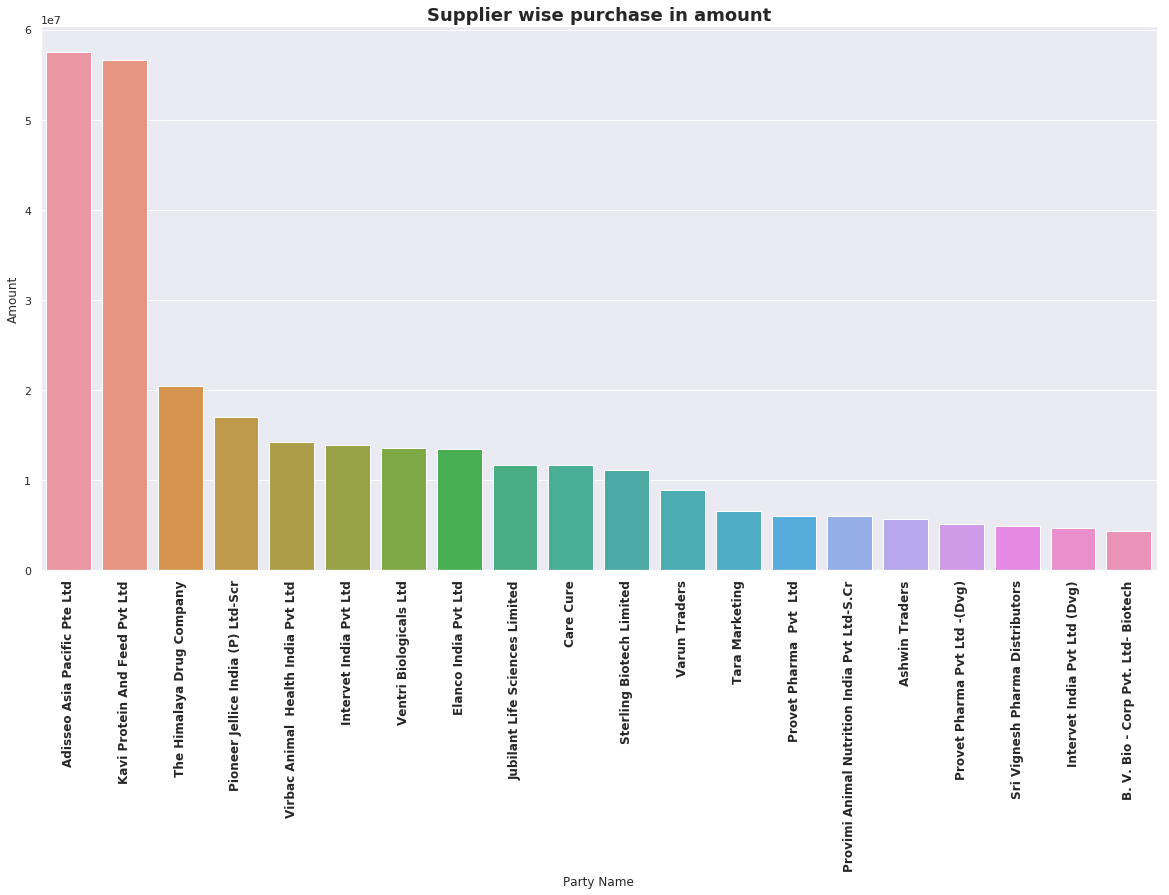

In [16]:
data = supplierwise_purchase_amt.head(20)
sns.barplot(data['Party Name'], data['Amount'])
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold')
plt.title('Supplier wise purchase in amount', fontsize = 18, fontweight = 'bold' )
plt.show()

In [18]:
itemwise_purchase_qty = purchase_df.groupby(['Item Name'], as_index=False)['Billed Quantity'].sum(). \
sort_values(by='Billed Quantity', ascending=False)
itemwise_purchase_qty.head(10)

,Item Name,Billed Quantity
204,D L Methionine 99% - 1 Kg,206025
29,Addisodium 1 Kg,168000
151,CHOLINE CHLORIDE-A 1 KG,131750
344,Hatching Egg Cobb,129757
99,BOROSIL GLASS A.I. TIPS SMALL,126000
463,L - Lysine 99% - 1 Kg,118050
705,Rhodimate AT 88,82250
765,Sunflowerdeoiledcakemeal1kg Poultryfeed Suppl...,69730
98,BOROSIL GLASS A 1 TIPS ST QTY,65000
720,SODIUM BI CARBONATE 1 KG,48800


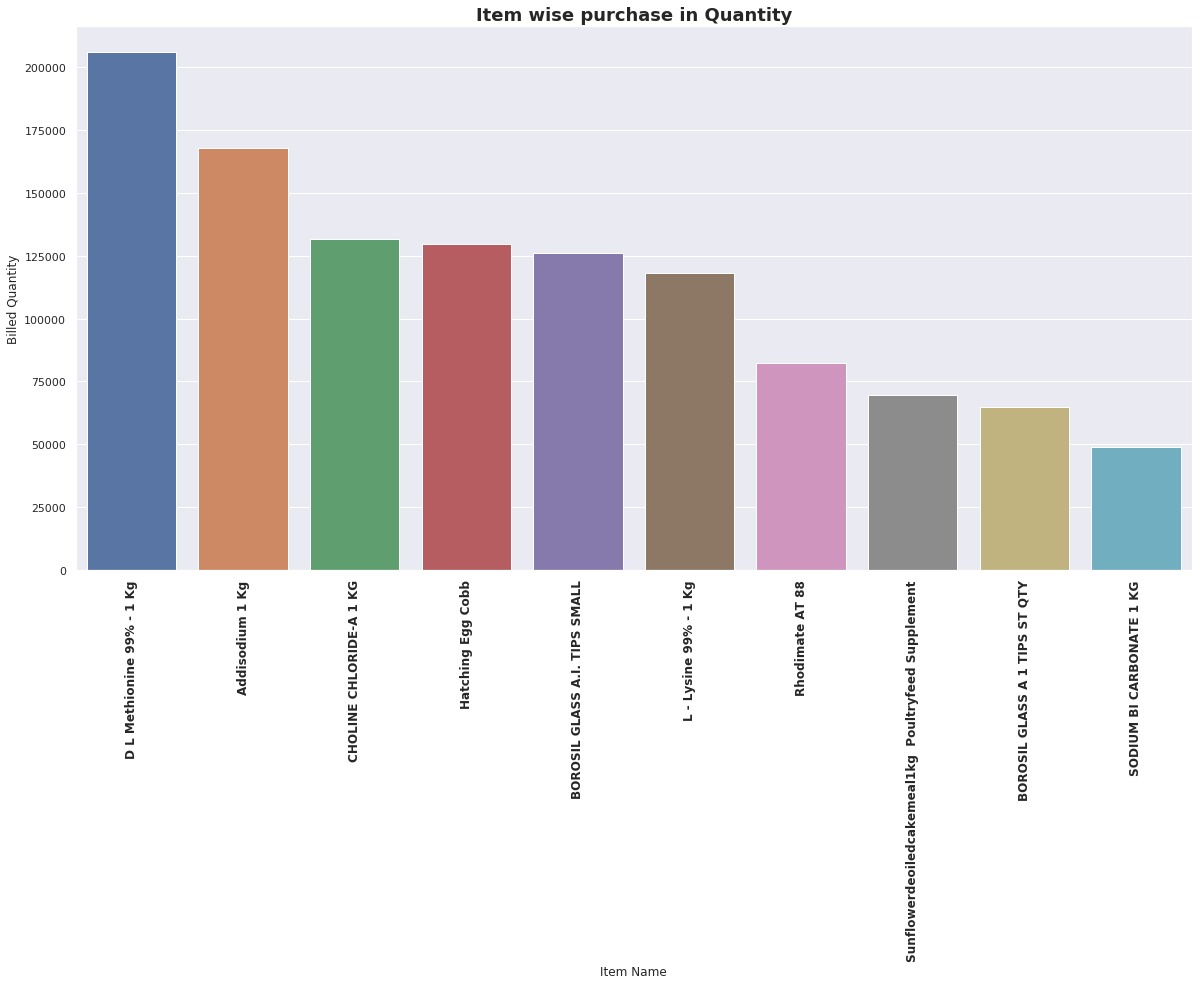

In [19]:
data =itemwise_purchase_qty.head(10)
sns.barplot(data['Item Name'], data['Billed Quantity'])
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold')
plt.title('Item wise purchase in Quantity', fontsize = 18, fontweight = 'bold' )
plt.show()

In [20]:
purchase_df.groupby(['Date','Party Name', 'Item Name'], as_index=False)['Amount'].sum(). \
sort_values(by='Amount', ascending=False).head(20)

,Date,Party Name,Item Name,Amount
1520,2018-07-12,Kavi Protein And Feed Pvt Ltd,D L Methionine 99% - 1 Kg,3898304.00
334,2018-04-25,Kavi Protein And Feed Pvt Ltd,D L Methionine 99% - 1 Kg,3830508.00
633,2018-05-14,Kavi Protein And Feed Pvt Ltd,D L Methionine 99% - 1 Kg,3830507.57
1533,2018-07-13,Adisseo Asia Pacific Pte Ltd,Rhodimate AT 88,2867110.00
1726,2018-07-28,Adisseo Asia Pacific Pte Ltd,Rhodimate AT 88,2862996.00
2237,2018-09-01,Adisseo Asia Pacific Pte Ltd,Rhodimate AT 88,2848599.00
730,2018-05-21,Adisseo Asia Pacific Pte Ltd,Rhodimate AT 88,2823918.00
1224,2018-06-21,Adisseo Asia Pacific Pte Ltd,Rovabio Advanced T-Flex 1kg,2626550.00
3379,2018-11-27,Elanco India Pvt Ltd,Surmax 100 - 25 Kg,2500000.00
3006,2018-10-30,Elanco India Pvt Ltd,Surmax 100 - 25 Kg,2500000.00


In [21]:
purchase_df.groupby(['Party Name', 'Item Name'], as_index=False)['Amount'].sum(). \
sort_values(by='Amount', ascending=False).head(20)+

,Party Name,Item Name,Amount
419,Kavi Protein And Feed Pvt Ltd,D L Methionine 99% - 1 Kg,37872447.77
562,Pioneer Jellice India (P) Ltd-Scr,POULTRY FEED DCP 50 KG,16979000.00
22,Adisseo Asia Pacific Pte Ltd,Rovabio Advanced T-Flex 1kg,14060753.00
391,Jubilant Life Sciences Limited,CHOLINE CHLORIDE-A 1 KG,11669350.00
20,Adisseo Asia Pacific Pte Ltd,Rhodimate AT 88,11402623.00
17,Adisseo Asia Pacific Pte Ltd,Alterion 1 Kg,11374163.00
762,Sterling Biotech Limited,POULTRY FEED DCP FS 50 KG,10852800.00
919,Varun Traders,Poultry Feed DCP Rock 50 Kg,8706500.00
19,Adisseo Asia Pacific Pte Ltd,Microvit E Promix (VIT E),8282512.00
435,Kavi Protein And Feed Pvt Ltd,L - Lysine 99% - 1 Kg,7447919.78
